In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
image = cv2.imread('coins3.jpg', cv2.IMREAD_GRAYSCALE)

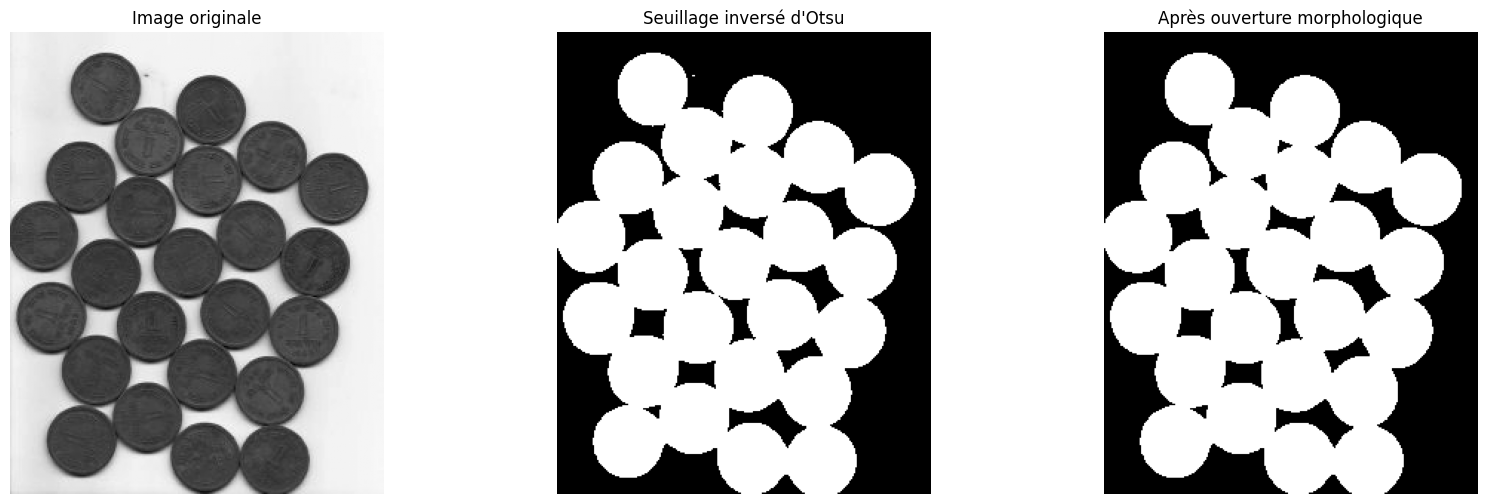

In [ ]:
_, thresh_otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((5, 5), np.uint8)
opened_image = cv2.morphologyEx(thresh_otsu, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.title('Image originale')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Seuillage inversé d\'Otsu')
plt.imshow(thresh_otsu, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Après ouverture morphologique')
plt.imshow(opened_image, cmap='gray')
plt.axis('off')

plt.show()

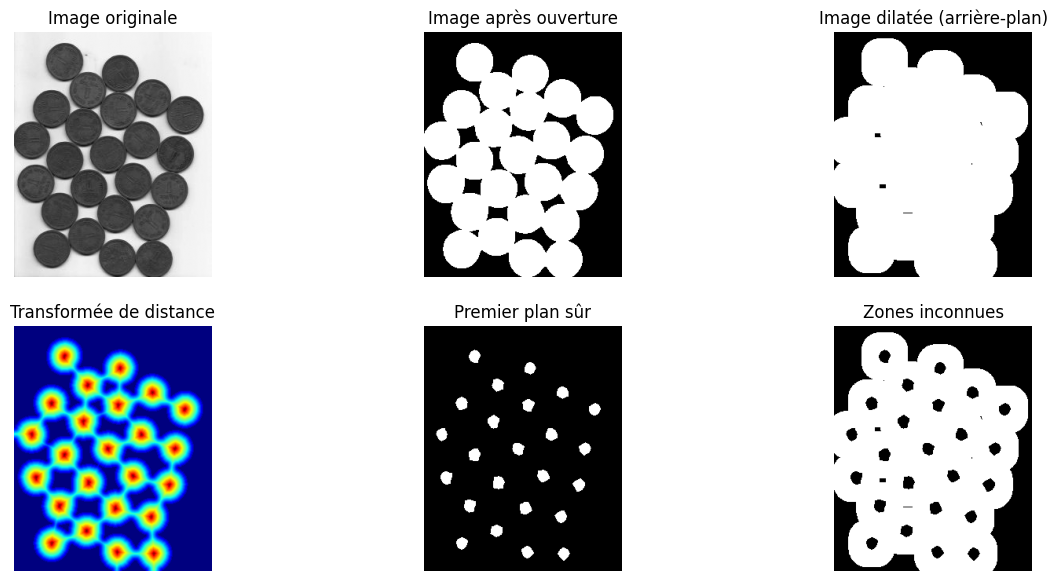

In [18]:
dilated_image = cv2.dilate(opened_image, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opened_image, cv2.DIST_L2, 5)


_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
sure_bg = np.uint8(dilated_image)

unknown = cv2.subtract(sure_bg, sure_fg)


plt.figure(figsize=(15, 7))

plt.subplot(2, 3, 1)
plt.title('Image originale')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Image après ouverture')
plt.imshow(opened_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Image dilatée (arrière-plan)')
plt.imshow(dilated_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Transformée de distance')
plt.imshow(dist_transform, cmap='jet')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Premier plan sûr')
plt.imshow(sure_fg, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title('Zones inconnues')
plt.imshow(unknown, cmap='gray')
plt.axis('off')

plt.show()